In [1]:
import numpy as np
import random, math
from scipy.optimize import minimize
from scipy.spatial import distance
import matplotlib.pyplot as plt

## Create Data 

In [2]:
np.random.seed(100)

classA = np.concatenate(
    (np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
    np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate(
    (np.ones(classA.shape[0]),
    - np.ones(classB.shape[0])))

N = inputs.shape[0]

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]


## Necessary functions

In [33]:
def linearKernel(x, y):
    return np.dot(x, y)

def polynomialKernel(x, y, p=3):
    return np.power((1 + np.dot(x, y)), p)

def rbfKernel(x, y, sigma=2):
    return np.exp(-(np.linalg.norm(x-y,2)**2)/(2*sigma**2))

In [32]:
def computeP (t, x, kernel):
    p = np.zeros((len(t), len(t)))
    for i in range(len(t)):
        for j in range(len(t)):
            p[i][j] = t[i] * t[j] * kernel(x[i], x[j])
    return p

In [10]:
def objective(alpha):
    sum_alpha_times_p = 0
    for i in range(N):
        for j in range(N):
            sum_alpha_times_p += alpha[i] * alpha[j] * p_ij[i][j]
    return 0.5 * sum_alpha_times_p - np.sum(alpha)

def zerofun(alpha): 
    return np.dot(alpha, targets)

In [7]:
def getSV(threshold, alpha): 
    sv = []
    for i in range(N):
        if alpha[i] > threshold:
            sv.append({'alpha': alpha[i], 'index':i, 'target': targets[i], 'input': inputs[i]})
    return sv 

def computeB(index, kernel):
    b = 0
    for i in range(len(sv)):
        b += sv[i]["alpha"] * sv[i]["target"] * kernel(sv[index]["input"], sv[i]['input'])
    return b - sv[index]['target']

def indicator (s, kernel):
    ind = 0
    for i in range(len(sv)):
        ind += sv[i]["alpha"] * sv[i]["target"] * kernel(s, sv[i]['input'])
    return ind - b

## Linear Kernel
#### C= None

In [16]:
p_ij = computeP(targets, inputs, linearKernel)

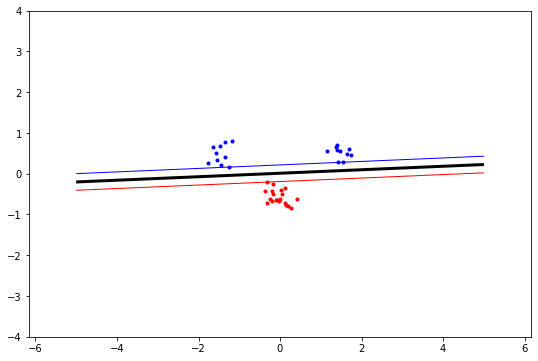

In [17]:
C = None 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
alpha = ret['x']
sv = getSV(10**-5, ret['x'])
b = computeB(0, linearKernel)

#plotting

plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)

grid = np.array([[indicator(np.array([x,y]), linearKernel) for x in xgrid] for y in ygrid])
plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

#### C = 5

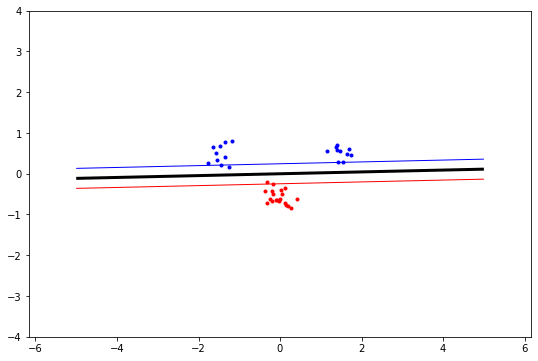

In [18]:
C = 5 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
alpha = ret['x']
sv = getSV(10**-5, ret['x'])
b = computeB(0, linearKernel)

#plotting

plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)

grid = np.array([[indicator(np.array([x,y]), linearKernel) for x in xgrid] for y in ygrid])
plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

## Polynomial Kernel p =3
#### C = None 

In [21]:
p_ij = computeP(targets, inputs, polynomialKernel)

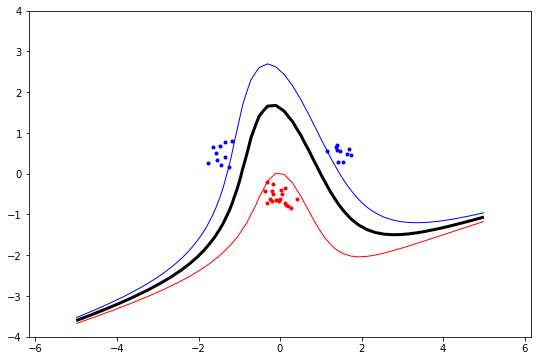

In [22]:
C = None 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
alpha = ret['x']
sv = getSV(10**-5, ret['x'])
b = computeB(0, polynomialKernel)

#plotting

plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)

grid = np.array([[indicator(np.array([x,y]), polynomialKernel) for x in xgrid] for y in ygrid])
plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

#### C=5

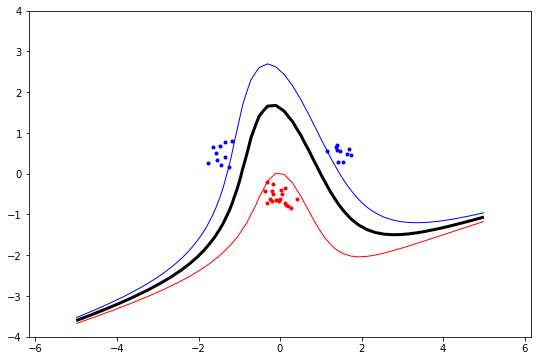

In [23]:
C = 5 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
alpha = ret['x']
sv = getSV(10**-5, ret['x'])
b = computeB(0, polynomialKernel)

#plotting

plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)

grid = np.array([[indicator(np.array([x,y]), polynomialKernel) for x in xgrid] for y in ygrid])
plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

## RBF Kernel
#### C=None

In [34]:
p_ij = computeP(targets, inputs, rbfKernel)

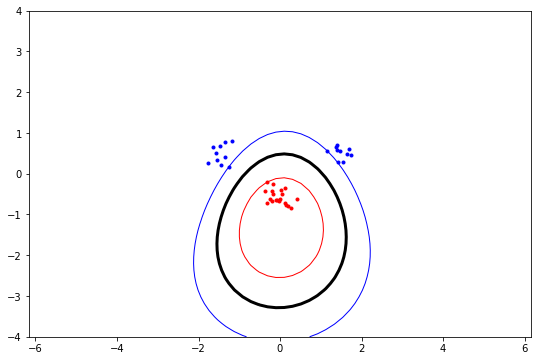

In [35]:
C = None 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
alpha = ret['x']
sv = getSV(10**-5, ret['x'])
b = computeB(0, rbfKernel)

#plotting

plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)

grid = np.array([[indicator(np.array([x,y]), rbfKernel) for x in xgrid] for y in ygrid])
plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

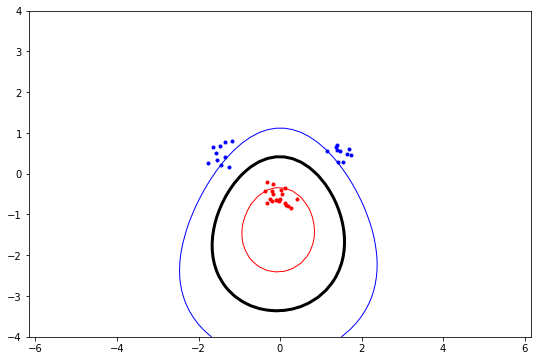

In [37]:
C = 5 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
alpha = ret['x']
sv = getSV(10**-5, ret['x'])
b = computeB(0, rbfKernel)

#plotting

plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)

grid = np.array([[indicator(np.array([x,y]), rbfKernel) for x in xgrid] for y in ygrid])
plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()